In [69]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano.tensor as tt
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline

# throughtput

In [70]:
throughput = pd.read_pickle("i915_throughput.pkl")
count_data = throughput.top2_count
n_count_data = count_data.size

In [71]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4548.21it/s]


In [72]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

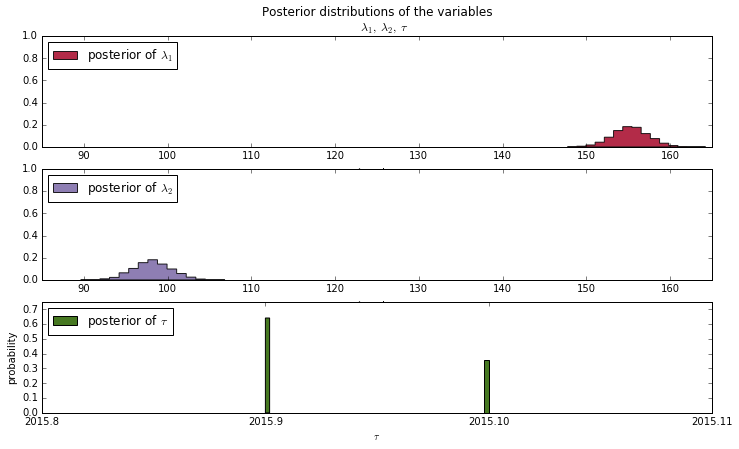

In [78]:
#figsize(12.5, 10)
#histogram of the samples:

plt.figure(figsize=(12, 6.75), facecolor="white")

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([85, 165])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([85, 165])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.' + str(t[1])))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([31, 34])
plt.xlabel(r"$\tau$ ")
plt.ylabel("probability");

In [9]:
count_data.index[33]

(2015, 10)

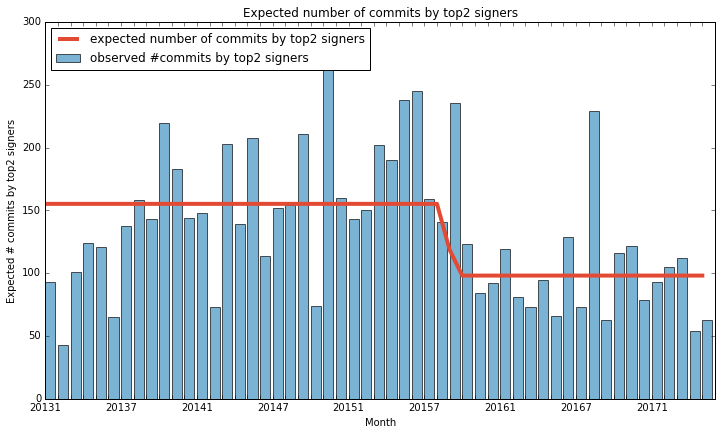

In [76]:

plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of commits by top2 signers")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected # commits by top2 signers")
plt.title("Expected number of commits by top2 signers")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed #commits by top2 signers")

plt.legend(loc="upper left");

# Max author count

In [100]:
author = pd.read_pickle("i915_author.pickle")
count_data = author['max']
n_count_data = count_data.size

In [101]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4898.76it/s]


In [102]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

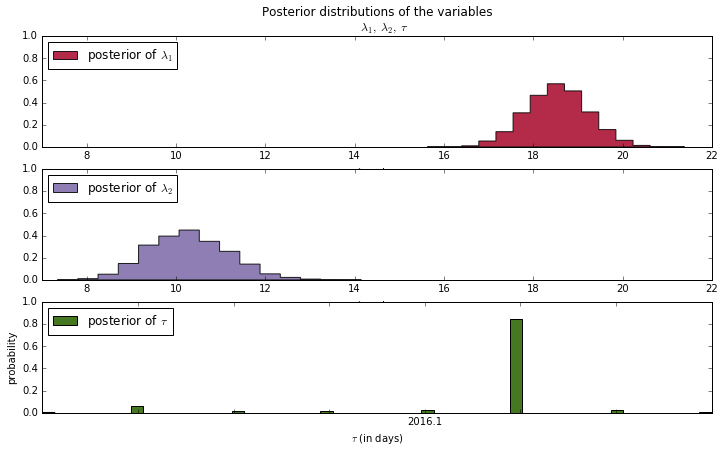

In [106]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))


plt.legend(loc="upper left")
plt.ylim([0, 1.0])
plt.xlim([32, 39])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

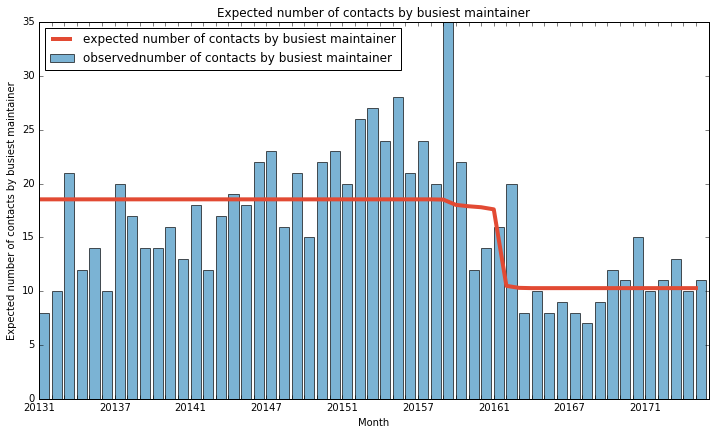

In [104]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of contacts by busiest maintainer")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of contacts by busiest maintainer")
plt.title("Expected number of contacts by busiest maintainer")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observednumber of contacts by busiest maintainer")

plt.legend(loc="upper left");

# Max files count

In [117]:
author = pd.read_pickle("i915_files.pickle")
count_data = author['max']
n_count_data = count_data.size

In [118]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4881.22it/s]


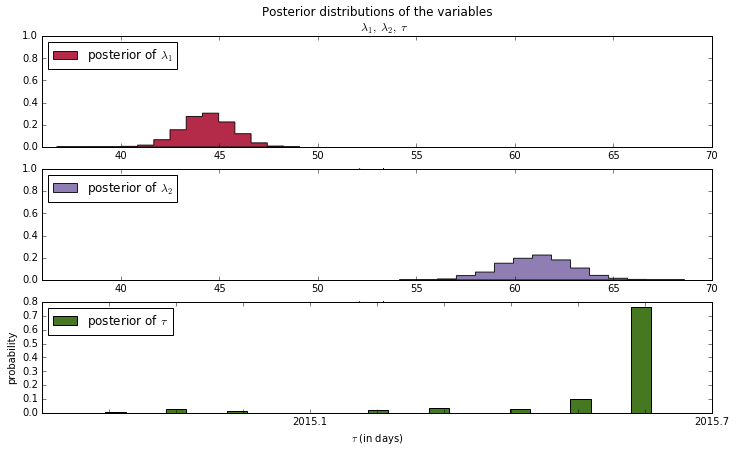

In [123]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([36.0, 70.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([36.0, 70.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))


plt.legend(loc="upper left")
#plt.ylim([0, .4])
plt.xlim([20, 30])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

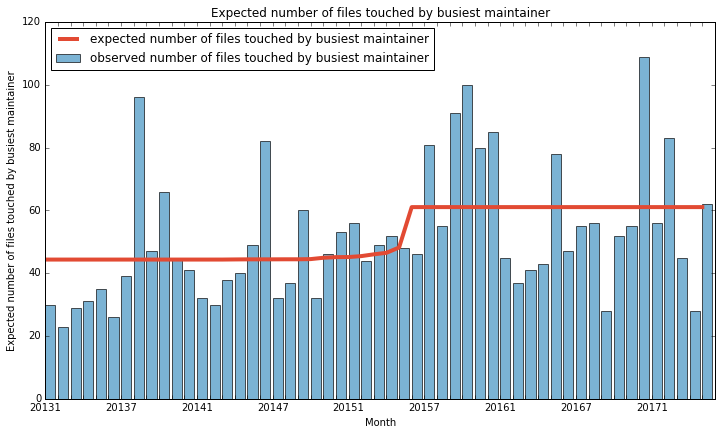

In [124]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of files touched by busiest maintainer")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of files touched by busiest maintainer")
plt.title("Expected number of files touched by busiest maintainer")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed number of files touched by busiest maintainer")

plt.legend(loc="upper left");

# active days

In [79]:
author = pd.read_pickle("i915_active_day.pickle")
count_data = author['count']
n_count_data = count_data.size

In [80]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4625.35it/s]


In [83]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

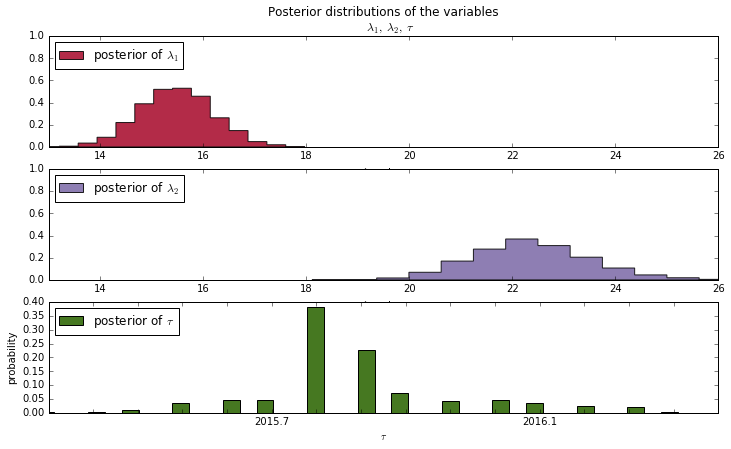

In [91]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([13.0, 26.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([13.0, 26.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))

plt.legend(loc="upper left")
plt.ylim([0, .4])
plt.xlim([25, 40])
plt.xlabel(r"$\tau$")
plt.ylabel("probability");

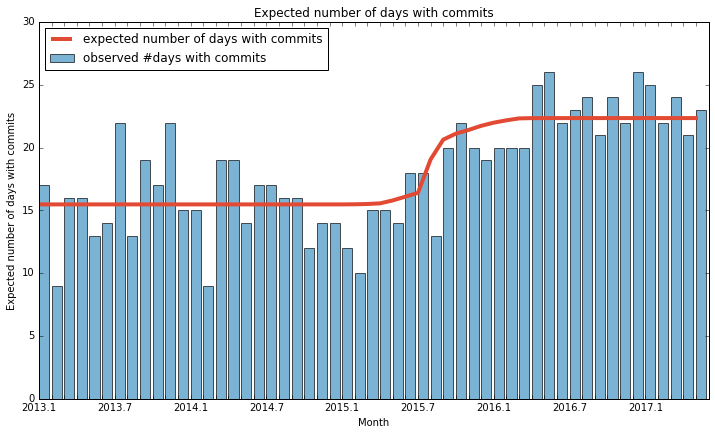

In [89]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of days with commits")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.' + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of days with commits")
plt.title("Expected number of days with commits")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed #days with commits")

plt.legend(loc="upper left");